<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/16%EC%9E%A5%20CNN%20%EC%9D%B5%ED%9E%88%EA%B8%B0%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 16 장 CNN 익히기 1

컴퓨터에게 글씨를 읽게 하고 글씨가 어떤 의미를 가지는지 알게하는 과정은 쉽지 않다.

MNIST 데이터셋은 미국 국립표준기술원이 손글씨를 이용해 70,000개의 글자 이미지에 0 ~ 9 까지의 이름표를 붙인 데이터셋으로 유명한 데이터 중 하나이다.

MNIST 데이터는 케라스를 이용해 간단히 불러올 수 있다.

In [27]:
# 데이터 로드
import pandas as pd
from keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


케라스 MNIST 데이터는 총 7만개의 이미지 중 6만개를 학습용으로, 1만개를 테스트용으로 미리 구분해 놓고 있다. 이를 다음과 같이 확인할 수 있다.

In [28]:
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


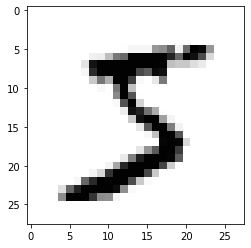

In [29]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')      # 흑백으로 출력
plt.show()

이 이미지를 컴퓨터는 어떻게 인식을 할 것인가?

먼저 이미지는 28 X 28 = 784개의 픽셀로 이루어져 있으며 밝기 정도에 따라 0 ~ 255 (256 = $2^{8}$) 까지의 등급을 매긴다. 흰색이 0, 글씨가 들어가 있는 곳은 1 ~ 255 까지의 숫자로 채워져 긴 행렬로 이루어진 하나의 집합으로 변환된다.


In [32]:
import sys
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%3d' % i)
  
  sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

이러한 이미지는 숫자의 집합으로 바뀌어 학습에 이용된다. 이를 이전까지 했던 예제와 같이 속성들로 생각하면 **784**개의 속성을 이용해 0 ~ 9까지 10개의 클래스 중 하나를 맞히는 문제가 된다.

이제 주어진 28by28의 행렬을 2차원 배열로 바꾸어 주어야 한다.




In [33]:
# 배열 형태 수정
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 784)
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


또한 케라스는 데이터를 0 에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보인다. 따라서 현재 0~255 사이의 값으로 이루어진 값을 0 ~ 1 사이의 값으로 바꿔 주어야 한다.

In [34]:
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [35]:
print("class : %d " % (Y_class_train[0]))

class : 5 


다음으로는 '아이리스 품종 예측' 모델에서와 같이 분류 문제이므로 '원-핫 인코딩'을 해주어야 한다.

In [39]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [40]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 데이터 전처리 전체 과정 정리

```
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
```

## 프레임 설정

이번에는 프레임을 설정할 것이다.

총 784개의 속성과 10개의 클래스가 있으니 다음과 같이 만들 수 있다.

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))                  # 이중 분류 - Dense(1, activation='sigmoid')

In [43]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

오차 함수로 이전 15장의 수치 예측에서는 **'mean_squred_error' 평균제곱오차** 또는 **평균 절대 오차** 등을 사용할 수 있고,

분류문제에서는 이중분류는 **'binary_crossentropy' 이항 교차 엔트로피**, 다중분류에서는 **'categorical_crossentropy' 범주형 교차 엔트로피**를 사용할 수 있다.

모델 실행에 앞서 모델의 성과를 저장하고 최적화 단계에서 학습을 중단하게끔 설정할 것이다.

10회 이상 성과 향상이 없을 시 자동으로 학습을 중단한다.

In [44]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

In [60]:
score = model.evaluate(X_test, Y_test)
print("Test loss: %.4f, Test Accuracy: %.4f" % (score[0], score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9844
Test loss: 0.0659, Test Accuracy: 0.9844


In [45]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30,
                    batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.15404, saving model to ./model/01-0.1540.hdf5

Epoch 2: val_loss improved from 0.15404 to 0.10524, saving model to ./model/02-0.1052.hdf5

Epoch 3: val_loss improved from 0.10524 to 0.08111, saving model to ./model/03-0.0811.hdf5

Epoch 4: val_loss improved from 0.08111 to 0.07881, saving model to ./model/04-0.0788.hdf5

Epoch 5: val_loss improved from 0.07881 to 0.06807, saving model to ./model/05-0.0681.hdf5

Epoch 6: val_loss improved from 0.06807 to 0.06438, saving model to ./model/06-0.0644.hdf5

Epoch 7: val_loss improved from 0.06438 to 0.05998, saving model to ./model/07-0.0600.hdf5

Epoch 8: val_loss improved from 0.05998 to 0.05982, saving model to ./model/08-0.0598.hdf5

Epoch 9: val_loss improved from 0.05982 to 0.05926, saving model to ./model/09-0.0593.hdf5

Epoch 10: val_loss did not improve from 0.05926

Epoch 11: val_loss did not improve from 0.05926

Epoch 12: val_loss did not improve from 0.05926

Epoch 13: val_loss did not i


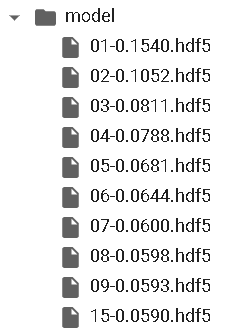

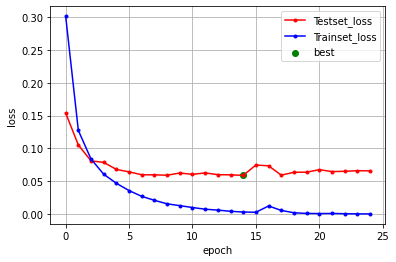

In [54]:
#실행결과 그래프로 표현

import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

#학습셋 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red',
         label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue',
         label = 'Trainset_loss')
plt.scatter(14, 0.059, c = 'green', label = 'best')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

과적합이 일어나기 전에 학습을 끝낸 것을 확인할 수 있으며 학습셋의 오차는 꾸준히 줄어드는 것을 볼 수 있다.


Epoch 1: val_loss improved from inf to 0.15273, saving model to ./model2/01-0.1527.hdf5

Epoch 2: val_loss improved from 0.15273 to 0.10604, saving model to ./model2/02-0.1060.hdf5

Epoch 3: val_loss improved from 0.10604 to 0.08148, saving model to ./model2/03-0.0815.hdf5

Epoch 4: val_loss improved from 0.08148 to 0.07761, saving model to ./model2/04-0.0776.hdf5

Epoch 5: val_loss improved from 0.07761 to 0.06872, saving model to ./model2/05-0.0687.hdf5

Epoch 6: val_loss improved from 0.06872 to 0.06671, saving model to ./model2/06-0.0667.hdf5

Epoch 7: val_loss improved from 0.06671 to 0.06097, saving model to ./model2/07-0.0610.hdf5

Epoch 8: val_loss did not improve from 0.06097

Epoch 9: val_loss improved from 0.06097 to 0.06070, saving model to ./model2/09-0.0607.hdf5

Epoch 10: val_loss did not improve from 0.06070

Epoch 11: val_loss did not improve from 0.06070

Epoch 12: val_loss did not improve from 0.06070

Epoch 13: val_loss did not improve from 0.06070

Epoch 14: val_l

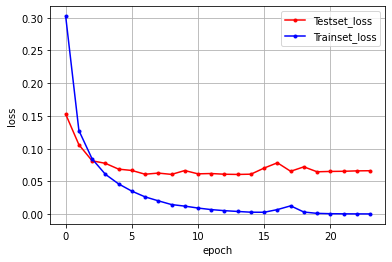

In [61]:
# 전체 코드

from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 로드드
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

#모델 프레임 설정정
model2 = Sequential()
model2.add(Dense(512, input_dim = 784, activation='relu'))
model2.add(Dense(10, activation='softmax'))    

#모델 실행 환경 설정
model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#모델 최적화 설정
MODEL_DIR = './model2/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

history = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30,
                    batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model2.evaluate(X_test, Y_test)[1]))

#테스트셋 오차
y_vloss = history.history['val_loss']

#학습셋 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red',
         label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue',
         label = 'Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()